In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

seed=42
np.random.seed = 42

In [2]:
usefullCollumns_list = ['id','usableAreas','totalAreas','parkingSpaces','address_zone','address_locationId'
,'address_neighborhood','suites','bedrooms','bathrooms','pricingInfos_price','pricingInfos_yearlyIptu'
,'pricingInfos_monthlyCondoFee','interestingFlag']

dtype_list = ['usableAreas','totalAreas','parkingSpaces','suites','bedrooms'
,'pricingInfos_price','pricingInfos_yearlyIptu','pricingInfos_monthlyCondoFee']

In [3]:
dataset = pd.read_csv('data/processed/train_cleaned.csv.gzip'
                      ,compression='gzip', sep =';')
dataset[[x for x in dtype_list]] = dataset[[x for x in dtype_list]].astype('float')

/home/villy/Desktop/git/imoveis/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
"""
Com filtro de 20 até 100 m²
estatística descritiva 
"""
dataset[(dataset['usableAreas']>20)&(dataset['usableAreas']<200)][usefullCollumns_list].describe()

,usableAreas,totalAreas,parkingSpaces,suites,bedrooms,bathrooms,pricingInfos_price,pricingInfos_yearlyIptu,pricingInfos_monthlyCondoFee
count,"34,817.00","34,817.00","34,281.00","32,154.00","34,817.00","34,817.00","34,817.00","30,256.00","33,215.00"
mean,87.25,78.79,1.46,0.88,2.42,1.96,"522,712.85",268.68,524.34
std,39.89,46.52,0.82,0.89,0.75,1.19,"374,710.46","1,464.92",440.58
min,21.00,0.00,0.00,0.00,0.00,0.00,"53,690.00",0.00,0.00
25%,56.00,51.00,1.00,0.00,2.00,1.00,"258,999.00",0.00,254.00
50%,74.00,70.00,1.00,1.00,2.00,2.00,"413,000.00",56.00,420.00
75%,110.00,105.00,2.00,1.00,3.00,3.00,"665,000.00",210.00,700.00
max,199.00,"1,505.00",19.00,10.00,8.00,7.00,"7,420,000.00","80,499.99","9,799.99"


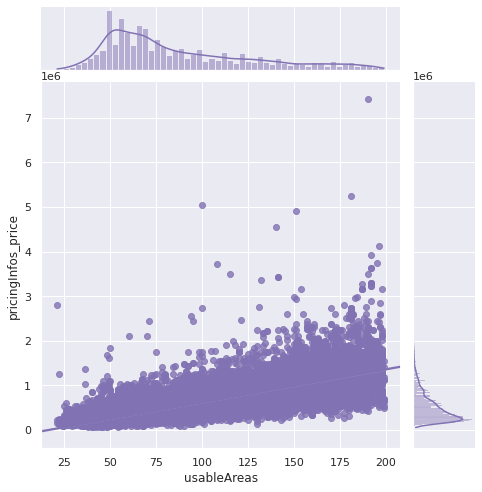

In [5]:
"""
percebemos que há uma tendência de quanto mais caro , maior o tamanho.
O que é bem óbvio
"""
_=dataset[(dataset['usableAreas']>20)&(dataset['usableAreas']<200)]
sns.set_theme(style="darkgrid")
sns.jointplot(x="usableAreas",y="pricingInfos_price",data=_
                  ,kind="reg", truncate=False,color="m", height=7
             )

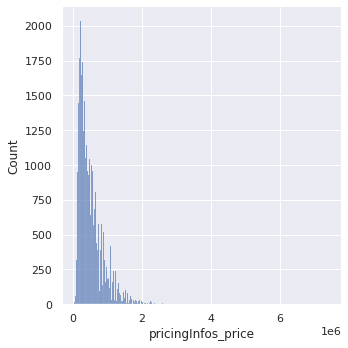

In [6]:
"""
dando um zoom no histograma de preço
Engraçado, achava que a curva seria mais para a direita
"""
sns.displot(_, x="pricingInfos_price")

[Text(0.5, 1.0, 'Box Plot - Preço por zona e interesse')]

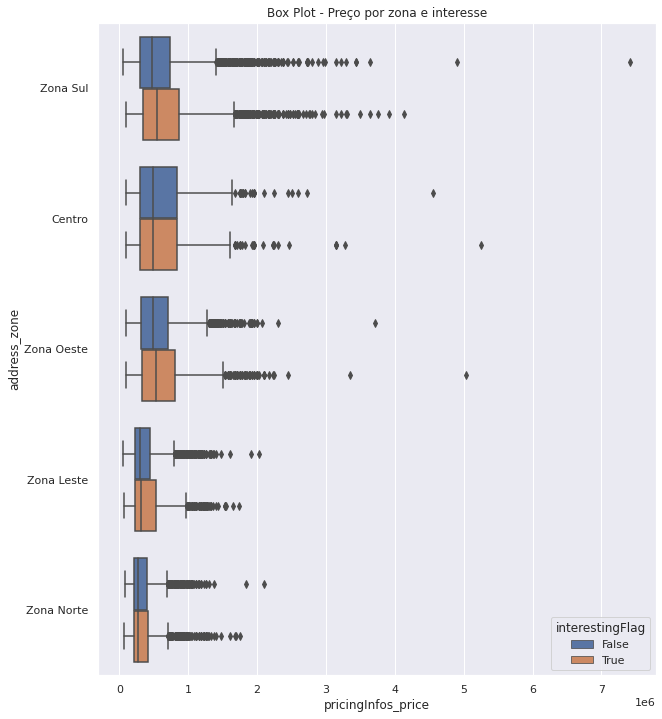

In [7]:
"""
A comparação da mediana é um pouco maior para Zona Sul, Oeste e Leste
Centro é um pouco menor pois, acredito,há muito metrô, museu, etc. É muito cômodo.
ZN é um local que há pouco metro/trem/shoppings/parques públicos
"""
_=dataset[(dataset['usableAreas']>20)&(dataset['usableAreas']<200)]


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,12)})

sns.boxplot(x="pricingInfos_price", y="address_zone", data=_
            , hue='interestingFlag').set(title='Box Plot - Preço por zona e interesse')

In [11]:
"""
há correlações positivas na maioria, tirando interestingFlag.
Bem isso mostra correlação linear, talvez essa feature não seja tão útil
"""
_=dataset[(dataset['usableAreas']>20)&(dataset['usableAreas']<200)]

_.interestingFlag =_.interestingFlag.apply(lambda x:1 if x else 0)
x =_[['address_zone','suites','bedrooms','bathrooms','pricingInfos_price'
                 ,'usableAreas','parkingSpaces','interestingFlag']]
x.corr(method='pearson')

/home/villy/Desktop/git/imoveis/env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,suites,bedrooms,bathrooms,pricingInfos_price,usableAreas,parkingSpaces,interestingFlag
suites,1.00,0.48,0.69,0.62,0.67,0.64,0.05
bedrooms,0.48,1.00,0.54,0.43,0.66,0.51,-0.02
bathrooms,0.69,0.54,1.00,0.59,0.68,0.57,0.06
pricingInfos_price,0.62,0.43,0.59,1.00,0.79,0.55,0.07
usableAreas,0.67,0.66,0.68,0.79,1.00,0.62,0.03
parkingSpaces,0.64,0.51,0.57,0.55,0.62,1.00,0.02
interestingFlag,0.05,-0.02,0.06,0.07,0.03,0.02,1.00


[Text(0.5, 1.0, 'Condomínio X Valor imóvel')]

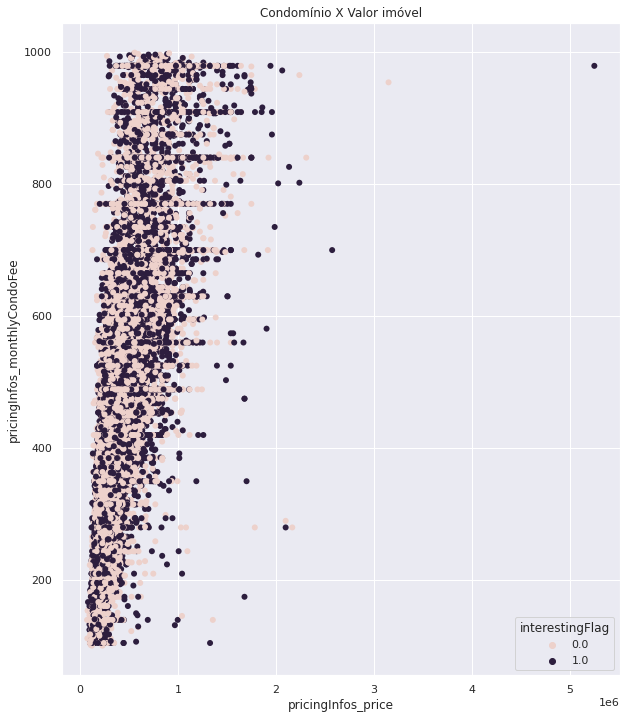

In [13]:
"""
Aqui o conseguimos ver uma relação bem linear do preço do condomínio Vs preço do imóvel, o que é bem óbvio
Note que 'interestingFlag' está no hue e no olho nada acontece. 

Talvez pela cidade inteira tenha coisas legais e não é preciso pagar mais pra ter certos confortos.
(Ou as pessoas mentem muito no title/description e eu não deveria usar essa feature)

Acho que como próximo passo é usar o lat long fornecido e calcular a distância com as informações do title ditas,
creio que as pessoas escrevem qualquer coisa.

"""
_=dataset[(dataset['usableAreas']>20)&(dataset['usableAreas']<200)
          &(dataset['pricingInfos_monthlyCondoFee']>100)
         &(dataset['pricingInfos_monthlyCondoFee']<1000)]

sns.scatterplot(x="pricingInfos_price"
                ,y="pricingInfos_monthlyCondoFee"
                ,sizes=(2, 6)
                ,linewidth=0
                ,data=_
               ,hue='interestingFlag' ).set(title='Condomínio X Valor imóvel')
